# Running and fitting EZmock

-----
This jupyter notebook demonstrates the process of generating EZmock catalogues with user-supplied parameters and comparing the clustering measurements with references.

In [1]:
import os, sys
pyez_path = os.getcwd() + 'python'
if not os.path.isfile(pyez_path + '/pyEZmock.py'):
    pyez_path='/global/u2/z/zhaoc/work/pyEZmock/python'
sys.path.append(pyez_path)
from pyEZmock import pyEZmock
%matplotlib inline

-----
Set the working directory, and initialise parameters for EZmock construction and clustering measurements. Detailed descriptions of the parameters can be found via `help(ez.set_param)` and `help(ez.set_clustering)`.

Typically only the following 4 parameters are changed during the fit:

| Parameter     | Description                              | Impact on clustering                                                                |
|---------------|------------------------------------------|------------------------------------------------------------------------------------|
| `pdf_base`    | Base number for PDF mapping              | Overall amplitude of *P*(*k*) and *B*(*&theta;*), and *&xi;*(*r*) at small *r* |
| `dens_scat`   | Density scattering scaling parameter     | *P*(*k*) at small *k* and *&xi;*(*r*) at small *r*, shape of *B*(*&theta;*)        |
| `rand_motion` | Scatter of peculiar velocity             | *P*<sub>2</sub>(*k*) at high *k* and *&xi;*<sub>2</sub>(*r*) at small *r*       |
| `dens_cut`    | Critical density for structure formation | *P*<sub>0</sub>(*k*) at small *k* and *&xi;*<sub>0</sub>(*r*) at small *r*       |

That is why these 4 parameters are set later, while the rest of the parameters are given at initialisation.

In [2]:
workdir = os.environ['SCRATCH'] + '/EZmock'
ez = pyEZmock(workdir)
ez.set_param(boxsize=1000, num_grid=256, redshift=0.9873, num_tracer=1000000)
ez.set_clustering(pk=True, pk_grid=512, xi=True, xi_ref_col=[1,2], bk=True, bk_grid=512,
    pk_ref='/global/u2/z/zhaoc/work/pyEZmock/test/PK_UNIT_DESI_Shadab_HOD_snap97_ELG_v1_4col.dat',
    xi_ref='/global/u2/z/zhaoc/work/pyEZmock/test/2PCF_UNIT_DESI_Shadab_HOD_snap97_ELG_v1_4col.dat',
    bk_ref='/global/u2/z/zhaoc/work/pyEZmock/test/BK_UNIT_DESI_Shadab_HOD_snap97_ELG_v1_4col.dat')

-----
Generate the job script for running EZmocks and clustering measurements with a given set of parameters. The job script can be either submitted to a slurm queue, or run manually when `queue` is not provided.

In practice, the function `run` is expected to be called many times for the fit. However, it may take long before the job enters the queue. It is thus highly recommended to reserve an interactive node, and run the job manually there, by e.g.

```bash
salloc -N 1 -q interactive -L SCRATCH -C haswell -t 4:00:00
```

In [3]:
# Submit the job to the debug queue (not recommended for fit).
ez.run(nthreads=64, queue='debug', pdf_base=0.4, dens_scat=1.5, rand_motion=100, dens_cut=0)

# Provide a command for running the job manually (recommended with interactive nodes).
#ez.run(nthreads=64, pdf_base=0.4, dens_scat=1.5, rand_motion=100, dens_cut=0)

Submitted batch job 38023132


-----
Plot clustering measurements set via the `set_clustering` function, obtained from the following sources in sequence:

1.   previous runs;
2.   the references;
3.   the current run.

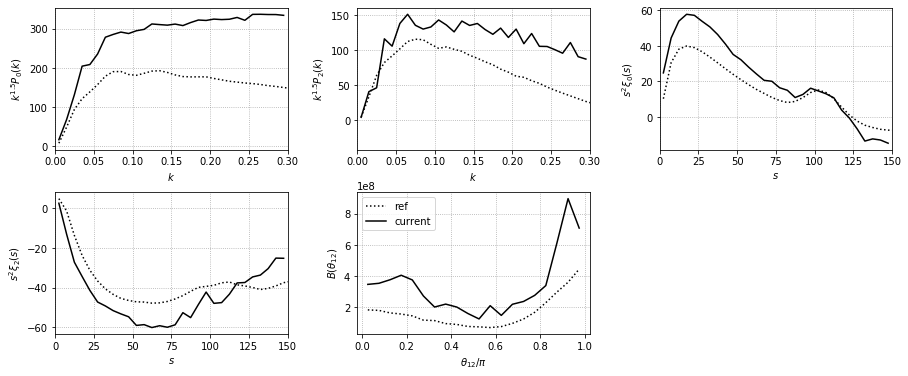

In [4]:
ez.plot()

-----
Continue running EZmocks and making plots after parameter revision.

In [5]:
ez.run(nthreads=64, pdf_base=0.25, dens_scat=1.5, rand_motion=100, dens_cut=0)

Job script generated. Please run the following command manually:
 
bash /global/cscratch1/sd/zhaoc/EZmock/B1000G256Z0.9873N1000000_b0.25d1.5r100c0/run_B1000G256Z0.9873N1000000_b0.25d1.5r100c0.sh


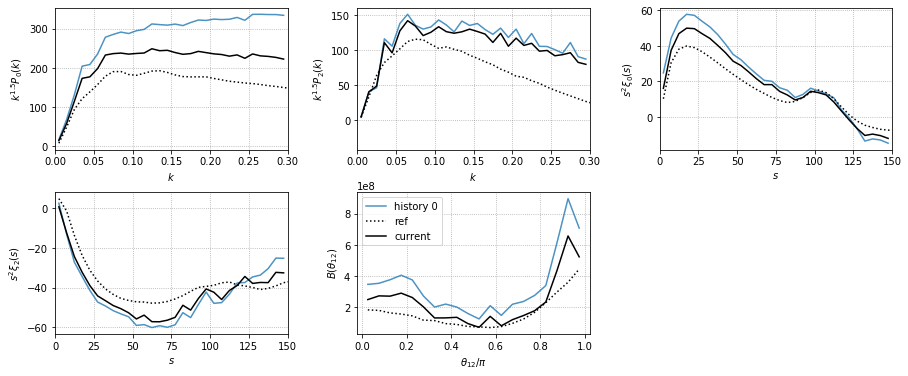

In [6]:
ez.plot()

In [7]:
ez.run(nthreads=64, pdf_base=0.25, dens_scat=1, rand_motion=100, dens_cut=0)

Job script generated. Please run the following command manually:
 
bash /global/cscratch1/sd/zhaoc/EZmock/B1000G256Z0.9873N1000000_b0.25d1r100c0/run_B1000G256Z0.9873N1000000_b0.25d1r100c0.sh


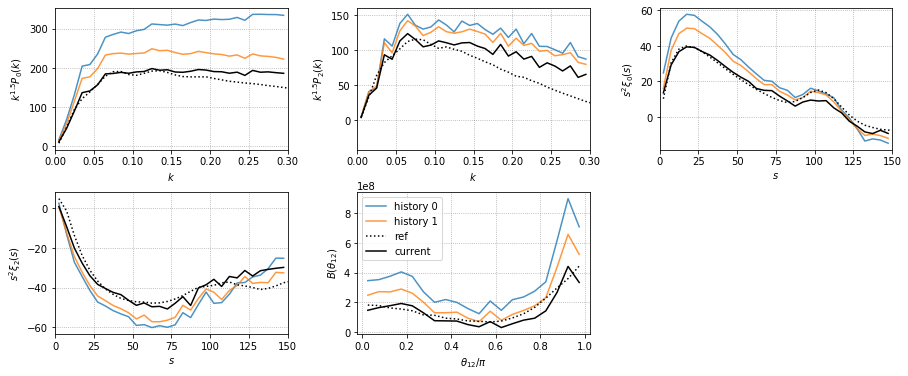

In [8]:
ez.plot()

In [9]:
ez.run(nthreads=64, pdf_base=0.25, dens_scat=1, rand_motion=200, dens_cut=0)

Job script generated. Please run the following command manually:
 
bash /global/cscratch1/sd/zhaoc/EZmock/B1000G256Z0.9873N1000000_b0.25d1r200c0/run_B1000G256Z0.9873N1000000_b0.25d1r200c0.sh


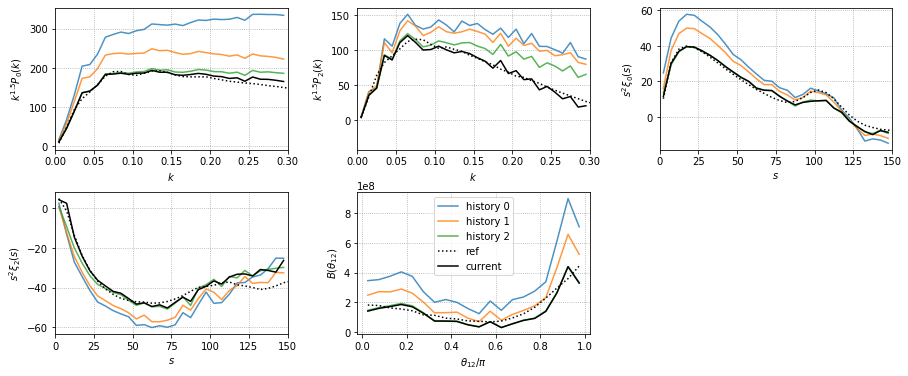

In [10]:
ez.plot()

-----
Check parameters of the current (`params` function) and previous (`history` function) runs. The indices of the histories are consistent with the ones showing in the plots above. 

In [11]:
ez.params()
print('----------')
ez.history()

boxsize = 1000.0
num_grid = 256
redshift = 0.9873
num_tracer = 1000000
pdf_base = 0.25
dens_scat = 1.0
rand_motion = 200.0
dens_cut = 0.0
seed = 1
omega_m = 0.307115
init_pk = /global/u2/z/zhaoc/work/pyEZmock/data/PlanckDM.linear.pk
----------
0: {'boxsize': 1000.0, 'num_grid': 256, 'redshift': 0.9873, 'num_tracer': 1000000, 'pdf_base': 0.4, 'dens_scat': 1.5, 'rand_motion': 100.0, 'dens_cut': 0.0, 'seed': 1, 'omega_m': 0.307115, 'init_pk': '/global/u2/z/zhaoc/work/pyEZmock/data/PlanckDM.linear.pk'}
1: {'boxsize': 1000.0, 'num_grid': 256, 'redshift': 0.9873, 'num_tracer': 1000000, 'pdf_base': 0.25, 'dens_scat': 1.5, 'rand_motion': 100.0, 'dens_cut': 0.0, 'seed': 1, 'omega_m': 0.307115, 'init_pk': '/global/u2/z/zhaoc/work/pyEZmock/data/PlanckDM.linear.pk'}
2: {'boxsize': 1000.0, 'num_grid': 256, 'redshift': 0.9873, 'num_tracer': 1000000, 'pdf_base': 0.25, 'dens_scat': 1.0, 'rand_motion': 100.0, 'dens_cut': 0.0, 'seed': 1, 'omega_m': 0.307115, 'init_pk': '/global/u2/z/zhaoc/work/pyEZmock/

-----
Clear the histories by slices.

In [12]:
sl = slice(0,1)
ez.clear(sl)
ez.history()

0: {'boxsize': 1000.0, 'num_grid': 256, 'redshift': 0.9873, 'num_tracer': 1000000, 'pdf_base': 0.25, 'dens_scat': 1.5, 'rand_motion': 100.0, 'dens_cut': 0.0, 'seed': 1, 'omega_m': 0.307115, 'init_pk': '/global/u2/z/zhaoc/work/pyEZmock/data/PlanckDM.linear.pk'}
1: {'boxsize': 1000.0, 'num_grid': 256, 'redshift': 0.9873, 'num_tracer': 1000000, 'pdf_base': 0.25, 'dens_scat': 1.0, 'rand_motion': 100.0, 'dens_cut': 0.0, 'seed': 1, 'omega_m': 0.307115, 'init_pk': '/global/u2/z/zhaoc/work/pyEZmock/data/PlanckDM.linear.pk'}
